In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
X=data.iloc[:,2:4].values    # input
X.shape

(400, 2)

In [4]:
y=data.iloc[:,-1].values    # output
y.shape

(400,)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [6]:
X_train.shape

(320, 2)

In [7]:
X_test.shape

(80, 2)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.25231799,  1.11110693],
       [ 0.23643356, -0.6964443 ],
       [ 1.21393667, -1.49650796],
       [ 1.31168698, -1.407612  ],
       [ 0.92068574, -0.81497225],
       [ 1.31168698,  1.8815386 ],
       [ 0.82293543, -1.407612  ],
       [-0.54556892,  1.37779481],
       [-1.03432047, -1.1705561 ],
       [ 1.11618636,  2.08896251],
       [ 1.89818884,  0.10361936],
       [ 0.13868325,  0.25177929],
       [ 2.09368946,  1.76301065],
       [ 0.23643356,  1.08147494],
       [-0.93657016, -1.14092411],
       [-1.52307202, -0.22233251],
       [ 2.09368946,  2.14822649],
       [-0.25231799, -0.6964443 ],
       [ 0.04093294,  0.01472339],
       [ 1.21393667,  0.51846718],
       [-0.05681737, -0.4593884 ],
       [-0.15456768,  0.13325134],
       [ 0.04093294,  1.25926686],
       [-0.83881985,  2.29638642],
       [-0.25231799,  0.19251532],
       [-1.13207078, -1.61503591],
       [ 1.01843605,  2.00006655],
       [-0.64331923,  0.10361936],
       [ 1.89818884,

In [10]:
X_test=scaler.fit_transform(X_test)
X_test

array([[ 0.26817656, -0.61839049],
       [-1.40243153, -1.13134113],
       [-0.87487108, -0.84636856],
       [ 0.09232308,  1.11994223],
       [ 0.44403005,  1.77537916],
       [-1.05072456,  0.49300256],
       [ 1.67500443, -0.19093163],
       [ 0.88366376, -1.07434662],
       [ 0.26817656, -0.41890969],
       [-0.17145715,  1.68988738],
       [-1.57828502, -0.87486581],
       [-0.25938389, -0.16243437],
       [ 1.14744398,  2.25983254],
       [ 0.70781027, -0.73237952],
       [ 0.26817656, -1.04584936],
       [ 0.70781027,  0.20802998],
       [ 0.88366376,  1.91786545],
       [ 0.00439634, -0.33341792],
       [-0.61109086, -0.01994808],
       [-0.0835304 ,  0.35051627],
       [ 0.88366376,  0.83496965],
       [-0.52316411,  2.37382157],
       [ 0.88366376, -0.96035759],
       [-0.25938389, -0.2764234 ],
       [-0.87487108,  0.63548885],
       [-1.40243153, -1.38781645],
       [-0.61109086, -1.47330823],
       [ 1.85085792, -1.07434662],
       [-1.31450479,

In [11]:
# calculating the value of k

# method 1-
np.sqrt(X_train.shape[0])

17.88854381999832

In [12]:
k=17

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [14]:
knn.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [15]:
y_pred=knn.predict(X_test)

In [16]:
y_pred.shape

(80,)

In [17]:
y_test.shape

(80,)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9375

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[45,  1],
       [ 4, 30]], dtype=int64)

In [20]:
# 2nd method for findind the value of k

accuracy=[]

for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [21]:
accuracy

[0.85,
 0.775,
 0.9375,
 0.925,
 0.9375,
 0.925,
 0.9375,
 0.9125,
 0.925,
 0.9,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9125,
 0.925,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125]

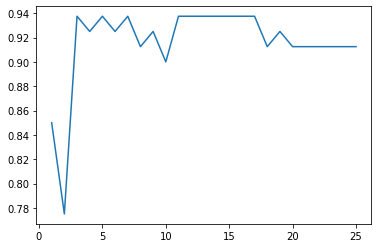

In [22]:
plt.plot(range(1,26),accuracy)

In [23]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [24]:
y_pred=knn.predict(X_test)

In [25]:
accuracy_score(y_test,y_pred)

0.9375

In [26]:
def predict_output():
    age=int(input("enter the age"))
    salary=int(input("enyter the salary"))
    
    X_new=np.array([[age],[salary]]).reshape(1,2)
    X_new=scaler.transform(X_new)
    
    if knn.predict(X_new)[0]==0:
        return "will not purchase"
    else:
        return "will purchase"
    
   

In [27]:
predict_output()

enter the age26
enyter the salary45000


'will not purchase'

In [29]:
a=np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
b=np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)


XX,YY=np.meshgrid(a,b)


In [30]:
XX

array([[-2.91407326, -2.90407326, -2.89407326, ...,  3.16592674,
         3.17592674,  3.18592674],
       [-2.91407326, -2.90407326, -2.89407326, ...,  3.16592674,
         3.17592674,  3.18592674],
       [-2.91407326, -2.90407326, -2.89407326, ...,  3.16592674,
         3.17592674,  3.18592674],
       ...,
       [-2.91407326, -2.90407326, -2.89407326, ...,  3.16592674,
         3.17592674,  3.18592674],
       [-2.91407326, -2.90407326, -2.89407326, ...,  3.16592674,
         3.17592674,  3.18592674],
       [-2.91407326, -2.90407326, -2.89407326, ...,  3.16592674,
         3.17592674,  3.18592674]])

In [31]:
YY

array([[-2.6446679, -2.6446679, -2.6446679, ..., -2.6446679, -2.6446679,
        -2.6446679],
       [-2.6346679, -2.6346679, -2.6346679, ..., -2.6346679, -2.6346679,
        -2.6346679],
       [-2.6246679, -2.6246679, -2.6246679, ..., -2.6246679, -2.6246679,
        -2.6246679],
       ...,
       [ 3.3053321,  3.3053321,  3.3053321, ...,  3.3053321,  3.3053321,
         3.3053321],
       [ 3.3153321,  3.3153321,  3.3153321, ...,  3.3153321,  3.3153321,
         3.3153321],
       [ 3.3253321,  3.3253321,  3.3253321, ...,  3.3253321,  3.3253321,
         3.3253321]])

In [33]:
# classifying every point on the meshgrid

#print(YY[0][0])
#print(XX[0][0])
#knn.predict(np.array([]))


input_array=np.array([XX.ravel(),YY.ravel()]).T            # ravel convert 2d array into 1d array ,here T for transpose

labels=knn.predict(input_array)

In [15]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

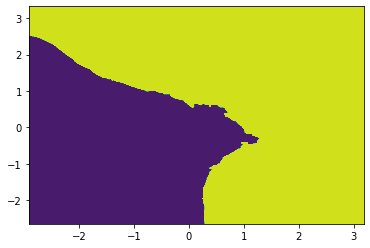

In [36]:
# plotting the array as an image

plt.contourf(XX,YY,labels.reshape(XX.shape))

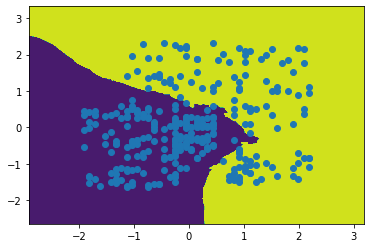

In [37]:
# plotting all the training data on the plot


plt.contourf(XX,YY,labels.reshape(XX.shape))
plt.scatter(X_train[:,0],X_train[:,1])

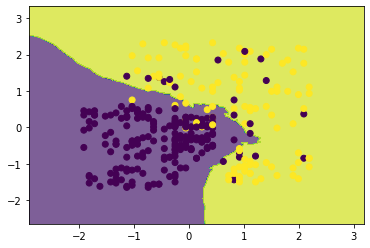

In [35]:
plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.7)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)